<a href="https://colab.research.google.com/github/SuloveBhattarai/Text_Summarization_Using_Pretrained_Model/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Usi

In [2]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
dataset['train']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

In [4]:
dataset['test']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 11490
})

In [5]:
dataset['validation']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 13368
})

In [6]:
dataset['train'][2]['article'][:300]

'MINNEAPOLIS, Minnesota (CNN) -- Drivers who were on the Minneapolis bridge when it collapsed told harrowing tales of survival. "The whole bridge from one side of the Mississippi to the other just completely gave way, fell all the way down," survivor Gary Babineau told CNN. "I probably had a 30-, 35-'

In [7]:
dataset['train'][2]['highlights']

'NEW: "I thought I was going to die," driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: "I probably had a 30-, 35-foot free fall"\nMinnesota bridge collapsed during rush hour Wednesday .'

In [8]:
import pandas as pd

In [9]:
# Convert the dataset to a pandas DataFrame
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

In [10]:
train_df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [12]:
from transformers import pipeline, set_seed

In [13]:
pipe= pipeline("text-generation",model= "gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


**Text Summarization**

In [14]:
set_seed(42)

In [15]:
dataset['train'][1]['article'][:1000]
input_text= dataset['train'][1]['article'][:2000]

query= input_text+ "\nTL;DR;\n"

pipe_out= pipe(query, max_length= 512, clean_up_tokenization_spaces= True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [16]:
pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [17]:
pipe_out[0]['generated_text'][len(query):]

'To get to the jail, you go to a house in a large village with a main street. The entrance to the village is just across from the county courthouse, with guard towers above it. We climbed by boat to a small little river about halfway up the hill. We stayed in one of the tiny houses and had a snack as the boats pulled up at the next village along the'

In [18]:
summaries= {}


In [19]:
summaries['gpt2-medium-380M']= pipe_out[0]['generated_text'][len(query):]

# Install T5 Transformers

In [ ]:
pipe= pipeline('summarization', model= 't5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
pipe_out= pipe(input_text)

In [ ]:
summaries['t5-base-223M']=pipe_out[0]['summary_text']

# BART

In [ ]:
pipe= pipeline("summarization", model= "facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
pipe_out= pipe(input_text)

In [ ]:
summaries['bart-large-cnn-400M']=pipe_out[0]['summary_text']

In [ ]:
summaries

{'bart-large-cnn-400M': 'Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police. He says about one-third of all people in the county jails are mentally ill.'}

# Pegasus Model

In [ ]:
pipe= pipeline('summarization', model= 'google/pegasus-cnn_dailymail')

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [20]:
pipe_out= pipe(input_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ValueError: Input length of input_ids is 429, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [ ]:
summaries['pegasus-cnn-568M']=pipe_out[0]['summary_text']

NameError: name 'pipe_out' is not defined

In [ ]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

NameError: name 'summaries' is not defined

GPT2 models are not accurate. Often they hallucinates and they invents facts by itself. As it was not explicitly trained to generate the summary. <br>
Bart Large model have almost similar output.<br>

T5 and Pegasus models seems to be the most accurate model

## **Fine- Tuning Summarization Model on Custom Datasets**

In [21]:
from datasets import load_dataset
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [22]:
#device= 'cpu'
model_ckpt= 'facebook/bart-large-cnn'
tokenizer= AutoTokenizer.from_pretrained(model_ckpt)
model= AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [23]:
samsum= load_dataset('samsum')

The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [24]:
samsum

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [25]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [26]:
samsum['train'][1]

{'id': '13728867',
 'dialogue': 'Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great',
 'summary': 'Olivia and Olivier are voting for liberals in this election. '}

In [27]:
dialogue_len= [len(x['dialogue'].split()) for x in samsum['train']]
print(type(dialogue_len))

<class 'list'>


In [28]:
summary_len= [len(x['summary'].split()) for x in samsum['train']]
print(type(summary_len))

<class 'list'>


In [29]:
for dialogue_len, summary_len in zip(dialogue_len, summary_len):
  print(f"{dialogue_len},  {summary_len}")

Streaming output truncated to the last 5000 lines.
72,  17
80,  24
53,  15
22,  10
217,  43
318,  48
96,  22
145,  28
158,  57
65,  12
17,  13
74,  24
126,  14
17,  9
99,  29
42,  32
76,  32
119,  23
19,  11
58,  9
90,  33
26,  8
63,  5
206,  32
154,  23
106,  11
114,  19
71,  20
26,  12
21,  10
141,  23
144,  19
155,  27
220,  49
222,  58
127,  39
236,  52
53,  22
59,  15
19,  11
74,  14
91,  26
112,  30
152,  13
15,  5
83,  15
77,  12
100,  32
14,  5
15,  8
41,  21
133,  29
36,  8
36,  6
98,  32
75,  16
115,  28
76,  9
18,  6
124,  24
260,  31
83,  15
44,  21
79,  19
19,  16
262,  11
34,  5
176,  39
79,  21
25,  17
129,  20
40,  12
166,  17
98,  29
36,  23
31,  12
88,  29
114,  14
122,  38
319,  37
33,  12
93,  28
29,  9
72,  13
121,  41
60,  14
111,  23
56,  23
44,  29
32,  14
32,  8
132,  31
45,  11
54,  22
73,  27
193,  21
62,  11
290,  23
37,  15
161,  39
91,  10
98,  26
163,  16
45,  11
89,  25
146,  19
74,  11
49,  8
123,  32
77,  18
83,  21
74,  20
338,  44
30,  17
38,  21
28,

### **From above we can notice the len of the summarized and the original dialogue talk**

# **Histograms**

In [33]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

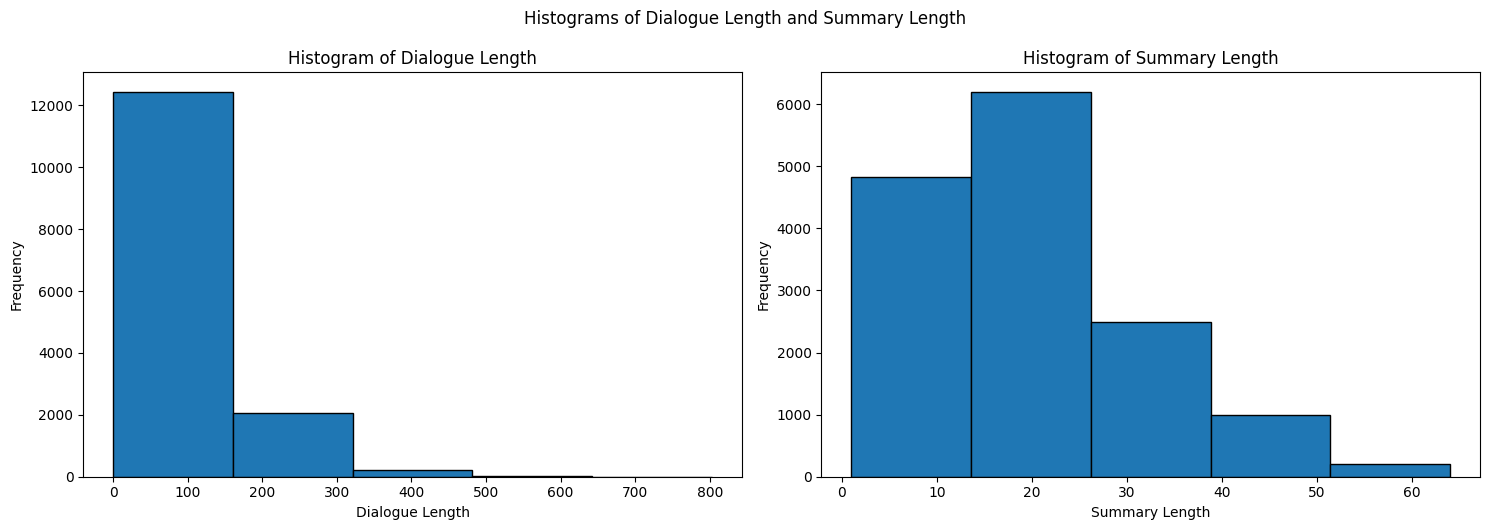

In [34]:
data1 = pd.DataFrame({'Dialogue Length': dialogue_len})
data2 = pd.DataFrame({'Summary Length': summary_len})
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for Dialogue Length
axes[0].hist(data1['Dialogue Length'], bins=5, edgecolor='black')
axes[0].set_title('Histogram of Dialogue Length')
axes[0].set_xlabel('Dialogue Length')
axes[0].set_ylabel('Frequency')

# Histogram for Summary Length
axes[1].hist(data2['Summary Length'], bins=5, edgecolor='black')
axes[1].set_title('Histogram of Summary Length')
axes[1].set_xlabel('Summary Length')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms of Dialogue Length and Summary Length', y=1.05)
plt.show()

In [35]:
def get_feature(batch):
  encodings= tokenizer(batch['dialogue'], text_target= batch['summary'], max_length= 1024, truncation= True)
  encodings= {'input_ids': encodings['input_ids'], 'attention_mask': encodings['attention_mask'], 'labels': encodings['labels']}
  return encodings

In [36]:
samsum_pt= samsum.map(get_feature, batched= True)


Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [37]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [38]:
columns= ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type= 'torch', columns= columns)

In [39]:
from transformers import DataCollatorForSeq2Seq
data_collator= DataCollatorForSeq2Seq(tokenizer, model= model)

In [40]:
from transformers import TrainingArguments, Trainer

In [41]:
training_args= TrainingArguments(
    output_dir= 'bart samsum',
    num_train_epochs= 1,
    warmup_steps= 500,
    per_device_train_batch_size= 4,
    per_device_eval_batch_size= 4,
    weight_decay= 0.01,
    logging_steps= 10,
    evaluation_strategy= 'steps',
    eval_steps= 500,
    save_steps= 1e6,
    gradient_accumulation_steps= 16
)

trainer= Trainer(model= model, args= training_args, tokenizer= tokenizer, data_collator= data_collator,
                 train_dataset= samsum_pt['train'], eval_dataset= samsum_pt['validation'])

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [42]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:656: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=230, training_loss=1.4834634656491488, metrics={'train_runtime': 1860.8801, 'train_samples_per_second': 7.917, 'train_steps_per_second': 0.124, 'total_flos': 8823027777404928.0, 'train_loss': 1.4834634656491488, 'epoch': 0.9991854466467553})

In [43]:
trainer.save_model('bart_samsum_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [46]:
pipe= pipeline('summarization', model= 'bart_samsum_model')
gen_kwargs= {'length_penalty': 0.8, 'num_beams': 8, 'max_length': 128}

custom_dialogue= """
Tom: What are you planning to do on coming holiday, Jerry?
Jerry: I think. I will go to trek in Annapurna Base Camp.
Tom: Oh! That's interesting. Are there any frieds you will be taking with you?
Jerry: No, it's a solo trek. I wanted to stay in the peace for some few days.
"""

print(pipe(custom_dialogue, **gen_kwargs))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


[{'summary_text': 'Jerry is going on a solo trek in Annapurna Base Camp. He wanted to stay in the peace for a few days. He is not taking any frieds with him on the trek. He will go on holiday in the next few days, he thinks.'}]


**Summarization examples**

In [48]:
custom_dialogue= """
Anubhav: Hey Aaram, what are you currently working on in your research?
Aaram: Hi Anubhav! I'm diving deep into Natural Language Processing (NLP). It's fascinating how we can make machines understand and generate human language.
Anubhav: That sounds intriguing! What specific area of NLP are you focusing on?
Aaram: I'm particularly interested in language translation and sentiment analysis. I think they have a lot of potential applications.
Anubhav: Definitely! Have you tried working with any specific models or tools?
Aaram: Yes, I've been using transformer models like BERT and GPT-3. They are incredibly powerful for a range of NLP tasks.
Anubhav: I've heard a lot about them. How do you handle the training of such large models?
Aaram: Training them from scratch can be quite resource-intensive, so I usually fine-tune pre-trained models on specific datasets. It saves a lot of time and computational power.
Anubhav: That makes sense. What kind of datasets are you using for your projects?
Aaram: For sentiment analysis, I use datasets like IMDb reviews and for translation, I rely on parallel corpora like Europarl and WMT datasets.
Anubhav: That's impressive, Aaram. Do you think NLP will be able to achieve human-like understanding anytime soon?
Aaram: It's hard to say, but the progress we've made so far is promising. With continued advancements and research, we might get there sooner than we expect.
Anubhav: I agree. It's an exciting field to be in right now. Good luck with your research, Aaram!
Aaram: Thanks, Anubhav! Let's catch up again soon and discuss more about our work.
"""

print(pipe(custom_dialogue, **gen_kwargs))

[{'summary_text': 'Aaram is working on Natural Language Processing (NLP). He is interested in language translation and sentiment analysis. He has been using transformer models like BERT and GPT-3 to train his models. He uses datasets like IMDb reviews for sentiment analysis and Europarl and WMT for translation.'}]


In [49]:
custom_dialogue= """
Cathy: Hey Kristen, have you ever been to Switzerland?
Kristen: Hi Cathy! Yes, I visited Switzerland last year. It's such a beautiful country with stunning landscapes.
Cathy: That sounds amazing! What places did you visit there?
Kristen: I went to Zurich, Lucerne, and Interlaken. Each place has its own charm. Zurich is vibrant and modern, Lucerne has that classic Swiss feel with its wooden bridges, and Interlaken is perfect for adventure sports.
Cathy: Wow, that sounds like a great mix of experiences. Did you get a chance to explore the Swiss Alps?
Kristen: Absolutely! I took a train to Jungfraujoch, known as the "Top of Europe." The views from up there are breathtaking. You feel like you're on top of the world.
Cathy: I've heard about that place. Did you try any Swiss cuisine while you were there?
Kristen: Yes, I did. The cheese fondue was delicious, and I also loved the Swiss chocolate. It's so creamy and rich. I even brought some back as souvenirs.
Cathy: Cheese fondue and Swiss chocolate sound like a must-try! What was your favorite part of the trip?
Kristen: It's hard to pick just one, but I'd say the tranquility and beauty of Lake Lucerne were unforgettable. Just sitting by the lake, surrounded by mountains, was so peaceful.
Cathy: That sounds like a dream. I'd love to visit Switzerland someday. Any tips for first-time travelers?
Kristen: Definitely! Make sure to get a Swiss Travel Pass. It gives you unlimited access to trains, buses, and boats. Also, be prepared for the weather changes, especially in the mountains. And don't forget to try some local delicacies.
Cathy: Great tips, Kristen. Thanks! I can't wait to plan my trip to Switzerland now.
Kristen: You're welcome, Cathy! You'll have an incredible time there. Let me know if you need any more advice.
"""

print(pipe(custom_dialogue, **gen_kwargs))


[{'summary_text': 'Kristen visited Switzerland last year. She went to Zurich, Lucerne, and Interlaken. She visited Jungfraujoch, known as the "Top of Europe" and the Swiss Alps. Her favorite part of the trip was the tranquility and beauty of LakeLucerne.'}]
